## Part 1

Loading the data and cleaning the data and etting the Date as index and sorting the rows by date in ascending order

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("stocks_unclean.csv",index_col= 'date', parse_dates = ['date'], dayfirst = True)
df = df.sort_values('date', ascending = True)
df.head()

,variable,value
date,,
2019-12-31,high_GOOG,1.338000e+03
2019-12-31,high_AAPL,7.342000e+01
2019-12-31,open_MSFT,1.567700e+02
2019-12-31,volume_MSFT,1.836940e+07
2019-12-31,close_AMZN,1.847840e+03


Making one column for each stock and concept: Open, Close, High, Low, Volume

In [3]:
df = df.replace({"variable" :{'(_APL)':'_AAPL', '(_GOG)':'_GOOG', '(_MST)':'_MSFT','(_AMZ\\b)':'_AMZN'}}, regex = True)
df['variable'].value_counts()

high_GOOG      522
low_MSFT       522
low_GOOG       522
low_AMZN       522
close_GOOG     522
high_AMZN      522
open_AMZN      522
volume_GOOG    522
close_MSFT     522
open_GOOG      522
volume_AMZN    522
close_AMZN     522
volume_MSFT    522
open_MSFT      522
high_MSFT      522
close_AAPL     519
open_AAPL      519
low_AAPL       519
high_AAPL      518
volume_AAPL    513
Name: variable, dtype: int64

In [4]:
df = df.pivot_table(index= 'date', values = 'value', columns = 'variable' )
df

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,low_GOOG,low_MSFT,open_AAPL,open_AMZN,open_GOOG,open_MSFT,volume_AAPL,volume_AMZN,volume_GOOG,volume_MSFT
date,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,73.419998,1853.260010,1338.000000,157.770004,72.379997,1832.229980,1329.084961,156.449997,72.482498,1842.000000,1330.109985,156.770004,100805600.0,2506500.0,961800.0,18369400.0
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,75.150002,1898.010010,1368.140015,160.729996,73.797501,1864.150024,1341.550049,158.330002,74.059998,1875.000000,1341.550049,158.779999,135480400.0,4029000.0,1406600.0,22622100.0
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,75.144997,1886.199951,1372.500000,159.949997,74.125000,1864.500000,1345.543945,NaN,74.287498,1864.500000,1347.859985,158.320007,146322800.0,3764400.0,1186400.0,21116200.0
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,74.989998,1903.689941,1396.500000,159.100006,73.187500,1860.000000,NaN,156.509995,73.447502,1860.000000,1350.000000,157.080002,118387200.0,4061800.0,1732300.0,20813700.0
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,75.224998,1913.890015,1402.989990,159.669998,74.370003,1892.040039,1390.380005,157.320007,74.959999,1904.500000,1397.939941,159.320007,108872000.0,4044900.0,1502700.0,21634100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,166.229996,3125.979980,2713.040039,303.329987,171.080002,3185.000000,2767.989990,313.910004,165.940002,3125.000000,2710.000000,302.700012,170.000000,3175.239990,2738.770020,306.290009,94815000.0,2662100.0,1039800.0,45933900.0
2022-01-20,164.509995,3033.350098,2670.129883,301.600006,169.679993,3160.000000,2758.239990,311.649994,164.179993,3027.020020,2662.889893,301.140015,166.979996,3135.320068,2730.280029,309.070007,91420500.0,3598700.0,1096500.0,35380700.0
2022-01-21,162.410004,2852.860107,2601.840088,296.029999,166.330002,3018.000000,2695.209961,304.109985,162.300003,2841.409912,2600.020020,295.609985,164.419998,2999.000000,2660.239990,302.690002,122501300.0,8164200.0,2087000.0,57118300.0


Filling the missing values

In [5]:
df = df.interpolate(method = 'linear', limit_direction = 'forward')
df

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,low_GOOG,low_MSFT,open_AAPL,open_AMZN,open_GOOG,open_MSFT,volume_AAPL,volume_AMZN,volume_GOOG,volume_MSFT
date,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,73.419998,1853.260010,1338.000000,157.770004,72.379997,1832.229980,1329.084961,156.449997,72.482498,1842.000000,1330.109985,156.770004,100805600.0,2506500.0,961800.0,18369400.0
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,75.150002,1898.010010,1368.140015,160.729996,73.797501,1864.150024,1341.550049,158.330002,74.059998,1875.000000,1341.550049,158.779999,135480400.0,4029000.0,1406600.0,22622100.0
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,75.144997,1886.199951,1372.500000,159.949997,74.125000,1864.500000,1345.543945,157.419998,74.287498,1864.500000,1347.859985,158.320007,146322800.0,3764400.0,1186400.0,21116200.0
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,74.989998,1903.689941,1396.500000,159.100006,73.187500,1860.000000,1367.961975,156.509995,73.447502,1860.000000,1350.000000,157.080002,118387200.0,4061800.0,1732300.0,20813700.0
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,75.224998,1913.890015,1402.989990,159.669998,74.370003,1892.040039,1390.380005,157.320007,74.959999,1904.500000,1397.939941,159.320007,108872000.0,4044900.0,1502700.0,21634100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,166.229996,3125.979980,2713.040039,303.329987,171.080002,3185.000000,2767.989990,313.910004,165.940002,3125.000000,2710.000000,302.700012,170.000000,3175.239990,2738.770020,306.290009,94815000.0,2662100.0,1039800.0,45933900.0
2022-01-20,164.509995,3033.350098,2670.129883,301.600006,169.679993,3160.000000,2758.239990,311.649994,164.179993,3027.020020,2662.889893,301.140015,166.979996,3135.320068,2730.280029,309.070007,91420500.0,3598700.0,1096500.0,35380700.0
2022-01-21,162.410004,2852.860107,2601.840088,296.029999,166.330002,3018.000000,2695.209961,304.109985,162.300003,2841.409912,2600.020020,295.609985,164.419998,2999.000000,2660.239990,302.690002,122501300.0,8164200.0,2087000.0,57118300.0


In [6]:
#df.isnull().sum()

In [7]:
df.dtypes

variable
close_AAPL     float64
close_AMZN     float64
close_GOOG     float64
close_MSFT     float64
high_AAPL      float64
high_AMZN      float64
high_GOOG      float64
high_MSFT      float64
low_AAPL       float64
low_AMZN       float64
low_GOOG       float64
low_MSFT       float64
open_AAPL      float64
open_AMZN      float64
open_GOOG      float64
open_MSFT      float64
volume_AAPL    float64
volume_AMZN    float64
volume_GOOG    float64
volume_MSFT    float64
dtype: object

## Part 2

Visulaizing the data

- Creating a 2x2 grid of plots in which plot the "Open" in green and "Close" in red for each stock
- Repeating the 2x2 grid but resampling with the weekly average of "Open" and "Close"

In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Close vs open prices MSFT')

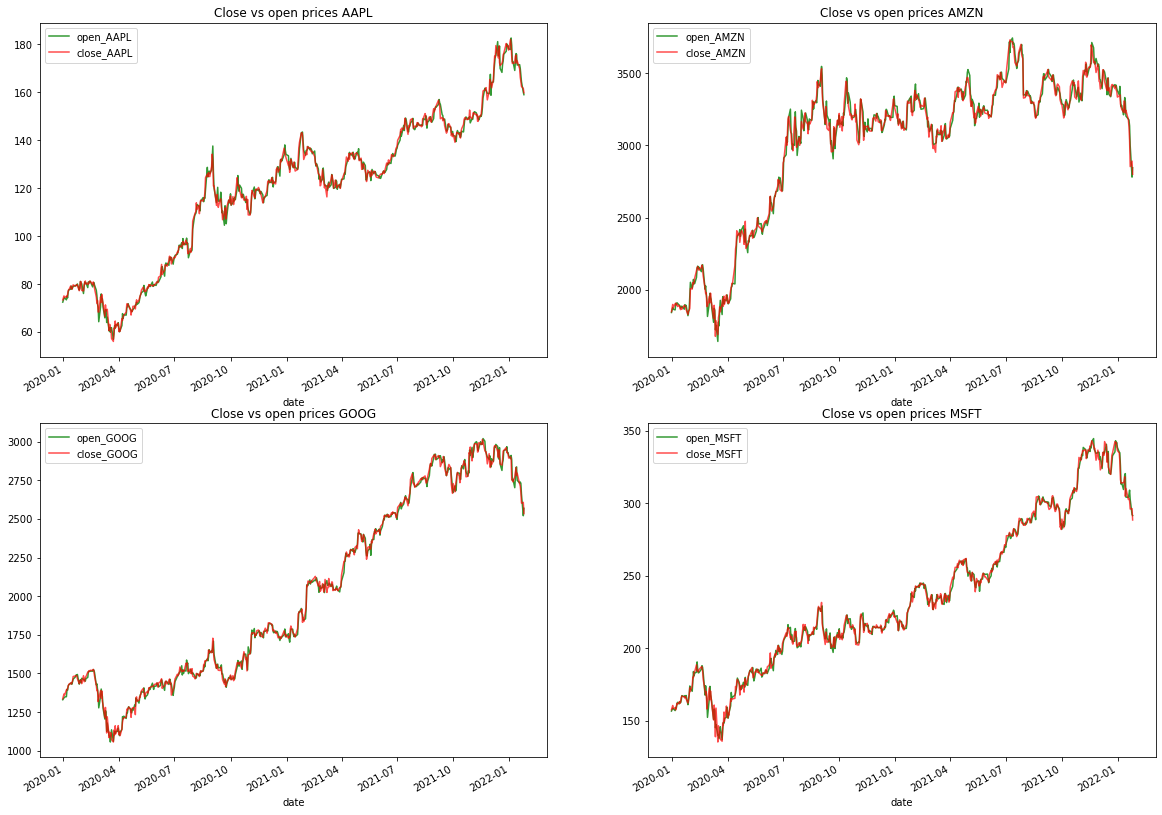

In [9]:
fig, ax = plt.subplots(2,2,figsize =(20,15))

df['open_AAPL'].plot(alpha=0.8, label='open_AAPL', color = 'green',ax = ax[0,0])
df['open_AMZN'].plot(alpha=0.8, label='open_AMZN', color = 'green',ax = ax[0,1])
df['open_GOOG'].plot(alpha=0.8, label='open_GOOG', color = 'green',ax = ax[1,0])
df['open_MSFT'].plot(alpha=0.8, label='open_MSFT', color = 'green',ax = ax[1,1])


df['close_AAPL'].plot(label='close_AAPL', color = 'red',alpha = .7,ax = ax[0,0])
df['close_AMZN'].plot(label='close_AMZN', color = 'red',alpha = .7,ax = ax[0,1])
df['close_GOOG'].plot(label='close_GOOG', color = 'red',alpha = .7,ax = ax[1,0])
df['close_MSFT'].plot(label='close_MSFT', color = 'red',alpha = .7,ax = ax[1,1])
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[0,0].set_title('Close vs open prices AAPL')
ax[0,1].set_title('Close vs open prices AMZN')
ax[1,0].set_title('Close vs open prices GOOG')
ax[1,1].set_title('Close vs open prices MSFT')

In [10]:
weekly_open_GOOG = df['open_GOOG'].resample("w").mean()
weekly_close_GOOG = df['close_GOOG'].resample('w').mean()
weekly_open_AAPL = df['open_AAPL'].resample("w").mean()
weekly_close_AAPL = df['close_AAPL'].resample('w').mean()
weekly_open_AMZN = df['open_AMZN'].resample("w").mean()
weekly_close_AMZN = df['close_AMZN'].resample('w').mean()
weekly_open_MSFT = df['open_MSFT'].resample("w").mean()
weekly_close_MSFT = df['close_MSFT'].resample('w').mean()

Text(0.5, 1.0, 'Weekly Close vs open prices MSFT')

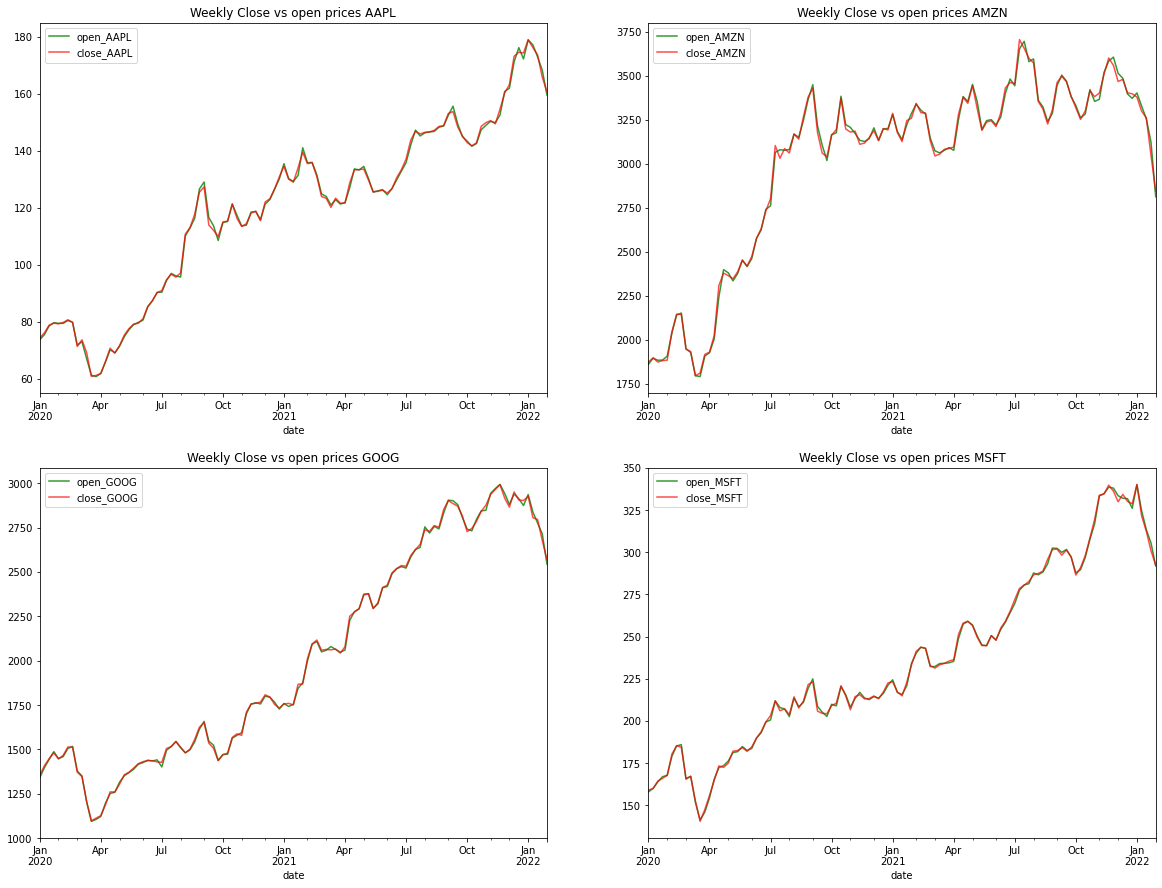

In [11]:
fig, ax = plt.subplots(2,2,figsize =(20,15))

weekly_open_AAPL.plot(alpha=0.8, label='open_AAPL', color = 'green',ax = ax[0,0])
weekly_open_AMZN.plot(alpha=0.8, label='open_AMZN', color = 'green',ax = ax[0,1])
weekly_open_GOOG.plot(alpha=0.8, label='open_GOOG', color = 'green',ax = ax[1,0])
weekly_open_MSFT.plot(alpha=0.8, label='open_MSFT', color = 'green',ax = ax[1,1])


weekly_close_AAPL.plot(label='close_AAPL', color = 'red',alpha = .7,ax = ax[0,0])
weekly_close_AMZN.plot(label='close_AMZN', color = 'red',alpha = .7,ax = ax[0,1])
weekly_close_GOOG.plot(label='close_GOOG', color = 'red',alpha = .7,ax = ax[1,0])
weekly_close_MSFT.plot(label='close_MSFT', color = 'red',alpha = .7,ax = ax[1,1])
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[0,0].set_title('Weekly Close vs open prices AAPL')
ax[0,1].set_title('Weekly Close vs open prices AMZN')
ax[1,0].set_title('Weekly Close vs open prices GOOG')
ax[1,1].set_title('Weekly Close vs open prices MSFT')

Plotting the yearly closed prices and comparing it to the yearly total stock volume 

In [12]:
AAPL = df['volume_AAPL'].sum()
AAPL

64426047750.0

No handles with labels found to put in legend.
/var/folders/mm/5rrm1_5d62b1349y9hng85n80000gn/T/ipykernel_87114/2540434724.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(('','','AAPL','', 'MSFT','', 'AMZN','', 'GOOG'))


[Text(0.5, 0, ''),
 Text(0.75, 0, ''),
 Text(1.0, 0, 'AAPL'),
 Text(1.25, 0, ''),
 Text(1.5, 0, 'MSFT'),
 Text(1.75, 0, ''),
 Text(2.0, 0, 'AMZN'),
 Text(2.25, 0, ''),
 Text(2.5, 0, 'GOOG'),
 Text(2.75, 0, ''),
 Text(3.0, 0, '')]

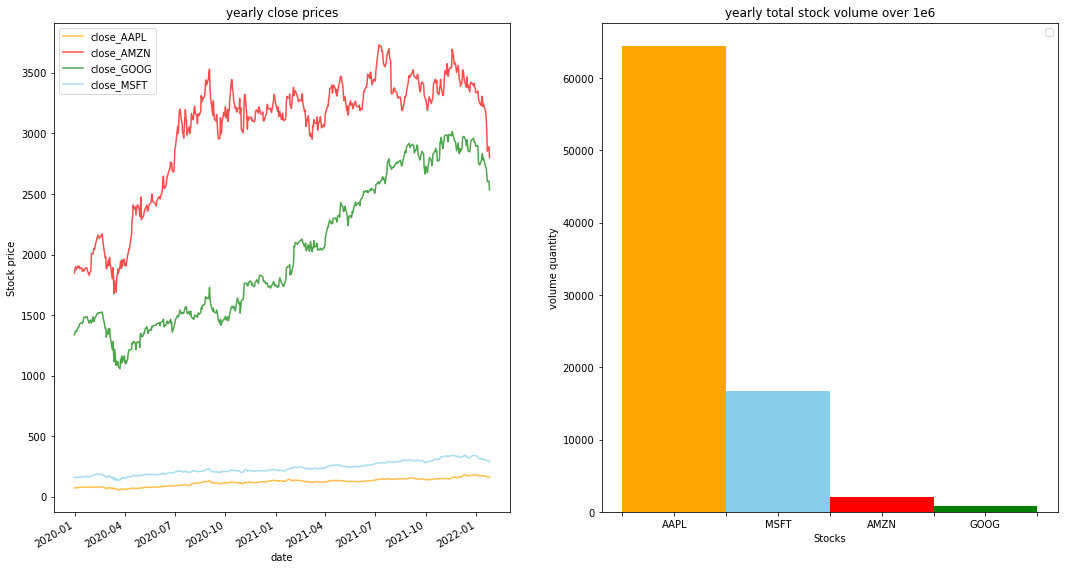

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize =(18,10))

df['close_AAPL'].plot(label='close_AAPL', color = 'orange',alpha = .7,ax = ax1)
df['close_AMZN'].plot(label='close_AMZN', color = 'red',alpha = .7,ax = ax1)
df['close_GOOG'].plot(label='close_GOOG', color = 'green',alpha = .7,ax = ax1)
df['close_MSFT'].plot(label='close_MSFT', color = 'skyblue',alpha = .7,ax = ax1)

N = 1
ind = np.arange(N)
AAPL = df['volume_AAPL'].sum()/1e6
GOOG = df['volume_GOOG'].sum()/1e6
MSFT = df['volume_MSFT'].sum()/1e6
AMZN = df['volume_AMZN'].sum()/1e6

p1 = plt.bar(ind+1,AAPL,width=0.5,color = 'orange')
p2 = plt.bar(ind+1.5,MSFT,width=0.5,color='skyblue')
p3 = plt.bar(ind+2,AMZN,width=0.5,color='red')
p4 = plt.bar(ind+2.5,GOOG,width=0.5,color='green')


ax1.legend()
ax2.legend()
ax1.set_title('yearly close prices')
ax1.set_ylabel('Stock price')
ax2.set_title('yearly total stock volume over 1e6')
ax2.set_ylabel('volume quantity')
ax2.set_xlabel('Stocks')
ax2.set_xticklabels(('','','AAPL','', 'MSFT','', 'AMZN','', 'GOOG'))

## Part 3

Creating a function that calculates the Return of Investment (ROI).
parameters:
- lookback: the number of days you hold the stock
- name: the name of the stock, using the "Close" value of the stock
- data: the dataframe with the stock data

getting the result for `roi(365, "GOOG", df)`.

In [14]:
def roi(lookback, name,df):
    roi_value = ((df[f'close_{name}'])-(df[f'close_{name}'].shift(lookback)))/(df[f'close_{name}'].shift(lookback))*100
    return roi_value

In [15]:
roi(365,'GOOG',df)

date
2019-12-31          NaN
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
                ...    
2022-01-19    81.536180
2022-01-20    78.472691
2022-01-21    75.762010
2022-01-24    73.065534
2022-01-25    66.927462
Name: close_GOOG, Length: 522, dtype: float64

Plotting the ROI for Google over 1 year

Text(0.5, 1.0, 'Google ROI 365 days')

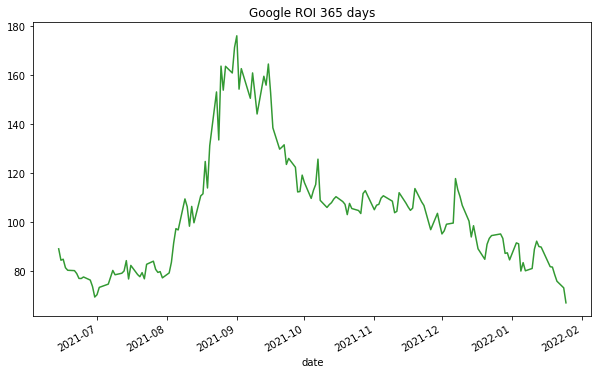

In [16]:
fig, ax = plt.subplots(1,figsize =(10,6))

roi(365,'GOOG',df).plot(label='ROI GOOGLE 365 days',color = 'green',alpha = .8,ax = ax)
ax.legend
ax.set_title('Google ROI 365 days')

## Part 4

Plotting the ROI of Google, Apple, Microsoft and Amazon over 90 , 190 and 365 days

Text(0, 0.5, 'ROI')

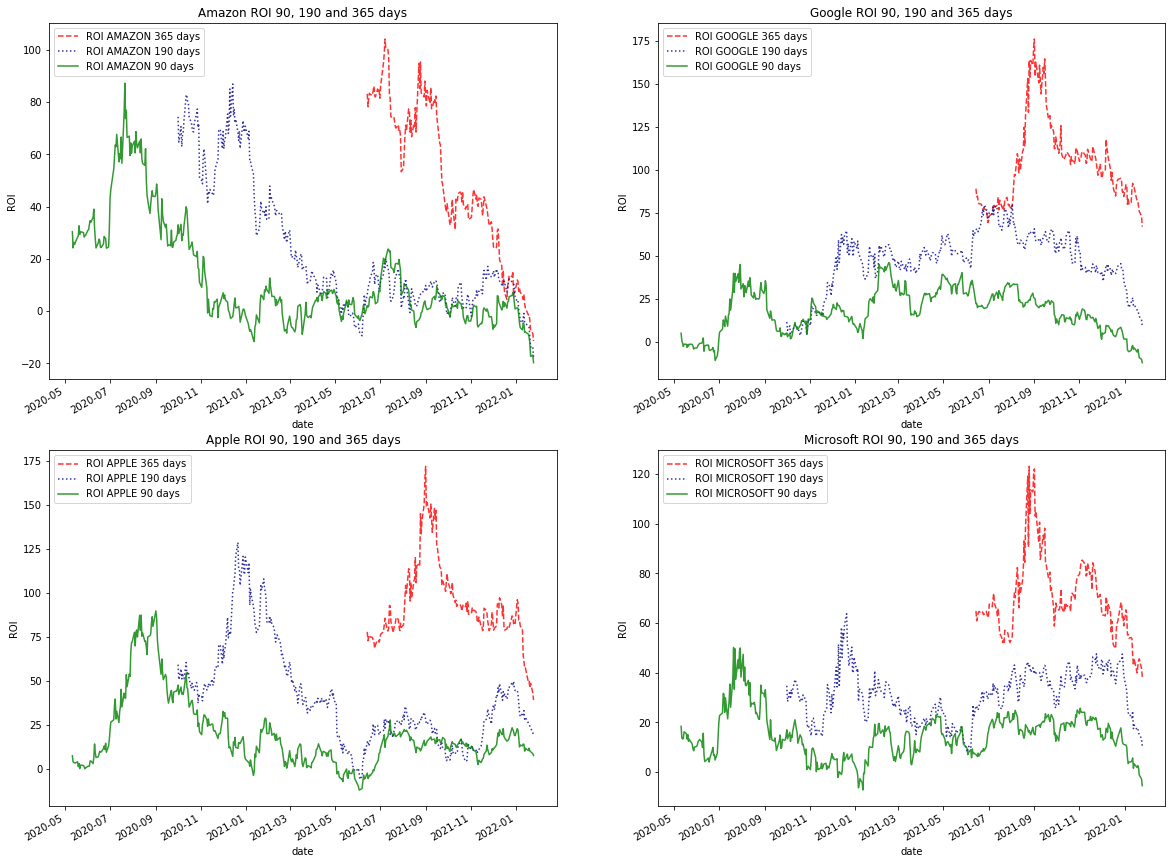

In [18]:
fig, ax = plt.subplots(2,2,figsize =(20,16))

roi(365,'AMZN',df).plot(label='ROI AMAZON 365 days', linestyle="--",color = 'red',alpha = .8,ax = ax[0,0])
roi(190,'AMZN',df).plot(label='ROI AMAZON 190 days',linestyle=":", color = 'darkblue',alpha = .8,ax = ax[0,0])
roi(90,'AMZN', df).plot(label='ROI AMAZON 90 days', color = 'green',alpha = .8,ax = ax[0,0])

roi(365,'GOOG',df).plot(label='ROI GOOGLE 365 days', linestyle="--",color = 'red',alpha = .8,ax = ax[0,1])
roi(190,'GOOG',df).plot(label='ROI GOOGLE 190 days',linestyle=":", color = 'darkblue',alpha = .8,ax = ax[0,1])
roi(90,'GOOG', df).plot(label='ROI GOOGLE 90 days', color = 'green',alpha = .8,ax = ax[0,1])

roi(365,'AAPL',df).plot(label='ROI APPLE 365 days', linestyle="--",color = 'red',alpha = .8,ax = ax[1,0])
roi(190,'AAPL',df).plot(label='ROI APPLE 190 days',linestyle=":", color = 'darkblue',alpha = .8,ax = ax[1,0])
roi(90,'AAPL', df).plot(label='ROI APPLE 90 days', color = 'green',alpha = .8,ax = ax[1,0])

roi(365,'MSFT',df).plot(label='ROI MICROSOFT 365 days', linestyle="--",color = 'red',alpha = .8,ax = ax[1,1])
roi(190,'MSFT',df).plot(label='ROI MICROSOFT 190 days',linestyle=":", color = 'darkblue',alpha = .8,ax = ax[1,1])
roi(90,'MSFT', df).plot(label='ROI MICROSOFT 90 days', color = 'green',alpha = .8,ax = ax[1,1])

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[0,0].set_title('Amazon ROI 90, 190 and 365 days')
ax[0,1].set_title('Google ROI 90, 190 and 365 days')
ax[1,0].set_title('Apple ROI 90, 190 and 365 days')
ax[1,1].set_title('Microsoft ROI 90, 190 and 365 days')
ax[0,0].set_ylabel('ROI')
ax[0,1].set_ylabel('ROI')
ax[1,0].set_ylabel('ROI')
ax[1,1].set_ylabel('ROI')

## Part 5
making a function to calculate the ROI of different protfolio combinations

- Portfolio 1:
    - AAPL 40%
    - GOOG 30%
    - MSFT 20%
    - AMZN 10%


- Portfolio 2:
    - AAPL 30%
    - GOOG 20%
    - MSFT 10%
    - AMZN 40%

In [19]:
def roi_portfolio(lookback, name,df):
    ivi_value = df[f'close_{name}'].shift(lookback)
    roi_value = ((df[f'close_{name}'])-(df[f'close_{name}'].shift(lookback)))/(df[f'close_{name}'].shift(lookback))
    portfolio_value = (ivi_value * roi_value).mean()
    return portfolio_value

In [20]:
portfolio_1= (
    (roi_portfolio(365,'AAPL', df)*0.4)+
    (roi_portfolio(365,'GOOG', df)*0.3)+
    (roi_portfolio(365,'MSFT', df)*0.2)+
    (roi_portfolio(365,'AMZN', df)*0.1)
)
print(f'The return of portfolio 1 on the past year is {round(portfolio_1,2)}$')

The return of portfolio 1 on the past year is 581.78$


In [21]:
portfolio_2= (
    (roi_portfolio(365,'AAPL', df)*0.3)+
    (roi_portfolio(365,'GOOG', df)*0.2)+
    (roi_portfolio(365,'MSFT', df)*0.1)+
    (roi_portfolio(365,'AMZN', df)*0.4)
)
print(f'The return of portfolio 2 on the past year is {round(portfolio_2,2)}$')

The return of portfolio 2 on the past year is 737.96$


## Part 6

Making a fucntion to find the best possible combination to get highest ROI by generating random numbers and testing them all inside a loop

In [24]:
ROI_APPLE = (roi_portfolio(365,'AAPL', df))
ROI_GOOGLE = (roi_portfolio(365,'GOOG', df))
ROI_MICROSOFT = (roi_portfolio(365,'MSFT', df))
ROI_AMAZON = (roi_portfolio(365,'AMZN', df))

In [25]:
iteration = 5000000
new_port = 0.0
best_combo = [0.0,0.0,0.0,0.0]
for num in range(iteration):
    random_num = np.random.dirichlet(np.ones(4), size=1)
    best_return = (
        (ROI_APPLE*random_num[0,0])+
        (ROI_AMAZON*random_num[0,1])+
        (ROI_GOOGLE*random_num[0,2])+
        (ROI_MICROSOFT*random_num[0,3])
    )
    if new_port < best_return:
        new_port = best_return
        best_combo = random_num

In [26]:
print(f"the best combination would give a return of: {round((new_port),2)}$")
print(f'APPLE:{round((best_combo[0,0]*100),2)}%')
print(f'AMAZON:{round((best_combo[0,1]*100),2)}%')
print(f'GOOGLE:{round((best_combo[0,2]*100),2)}%')
print(f'MICROSOFT:{round((best_combo[0,3]*100),2)}%')

the best combination would give a return of: 1403.11$
APPLE:0.1%
AMAZON:0.09%
GOOGLE:99.56%
MICROSOFT:0.25%


Comparing ROI of the 2 portfolios to the one with the best possible combination

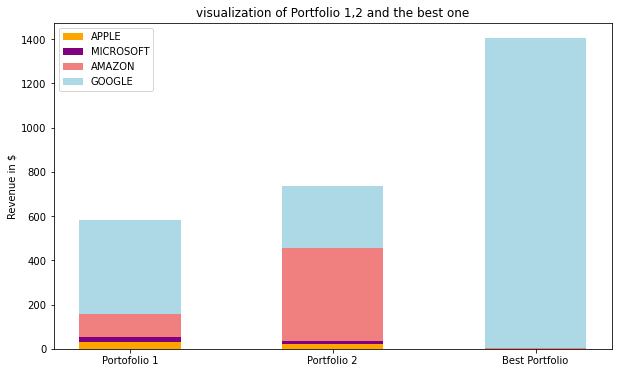

In [27]:
APPLE = np.array([ROI_APPLE*0.4, ROI_APPLE*0.3, ROI_APPLE*0.0002])
AMAZON = np.array([ROI_AMAZON*0.1, ROI_AMAZON*0.4, ROI_AMAZON*0.0019])
GOOGLE = np.array([ROI_GOOGLE*0.3, ROI_GOOGLE*0.2, ROI_GOOGLE*0.9956])
MICROSOFT = np.array([ROI_MICROSOFT*0.2, ROI_MICROSOFT*0.1, ROI_MICROSOFT*0.0022])

fig = plt.subplots(figsize = (10,6))
N=3
ind = np.arange(N)

p1 = plt.bar(ind,APPLE,width=0.5,color = 'orange')
p2 = plt.bar(ind,MICROSOFT,width=0.5,color='purple',bottom = APPLE)
p3 = plt.bar(ind,AMAZON,width=0.5,color='lightcoral',bottom = MICROSOFT + APPLE)
p4 = plt.bar(ind,GOOGLE,width=0.5,color='lightblue',bottom = AMAZON + MICROSOFT + APPLE)

plt.ylabel("Revenue in $")
plt.xticks(ind, ("Portofolio 1", "Portfolio 2", "Best Portfolio"))
plt.title("visualization of Portfolio 1,2 and the best one")
plt.legend((p1[0],p2[0],p3[0],p4[0]),('APPLE',"MICROSOFT","AMAZON","GOOGLE"))